### Look at the XYZ positions of the data

In [1]:
# import stuff
import sys,os,os.path

sys.path.append("../../")   # cite IC from parent directory
sys.path.append("/home/e78368jw/Documents/NEXT_CODE/next_misc/")
#sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

from    IC.invisible_cities.core.core_functions   import shift_to_bin_centers

import core.functions as func
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import probfit

import scipy.special as special
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.optimize import curve_fit

from scipy.integrate import quad

import iminuit
from iminuit import Minuit

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
#folder_paths = ['75_9e-3/PORT_1a/isaura/', '75_9e-3/PORT_1b/isaura/', '75_9e-3/PORT_2a/isaura/', '75_9e-3/PORT_2b/isaura/']
folder_paths = ['../FOM_merge&fit/12_12_18/PORT_1a/isaura/','../FOM_merge&fit/12_12_18/PORT_1b/isaura/', '../FOM_merge&fit/12_12_18/PORT_2a/isaura/', '../FOM_merge&fit/12_12_18/PORT_2b/isaura/'] #'15_15_15/PORT_1b/isaura/', '15_15_15/PORT_2a/isaura/', '15_15_15/PORT_2b/isaura/']
full_tracks = func.collate_ports(folder_paths)

# apply cuts, SATELLITE TRACKS ARE DIFFERENT RN
#low_e_tracks = func.remove_low_E_events(full_tracks)
low_e_tracks = full_tracks[full_tracks.energy > 0.05]
# count the number of events identified with unique event, and change numb_of_tracks to reflect this
event_counts = low_e_tracks['event'].value_counts(sort = False)

# apply this to numb_of_tracks
low_e_tracks['numb_of_tracks'] = low_e_tracks['event'].map(event_counts)

cut_tracks = func.apply_cuts(low_e_tracks, lower_z = 20, upper_z = 1170, r_lim = 415)


Porting ../FOM_merge&fit/12_12_18/PORT_1a/isaura/
50
100
150
200
250
300
Done! Tracks available: 87009
Porting ../FOM_merge&fit/12_12_18/PORT_1b/isaura/
50
100
150
200
250
300
Tracks: 84703
Done! Tracks available: 152826
Porting ../FOM_merge&fit/12_12_18/PORT_2a/isaura/
50
100
150
200
250
300
Tracks: 60529
Done! Tracks available: 198973
Porting ../FOM_merge&fit/12_12_18/PORT_2b/isaura/
50
100
150
200
250
300
Tracks: 80864
Done! Tracks available: 259847


/tmp/ipykernel_40743/3178469909.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_e_tracks['numb_of_tracks'] = low_e_tracks['event'].map(event_counts)


Cutting events around fiducial volume related to:
Z range between 20 and 1170
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 40.10 %
Absolute Cut efficiency:
Efficiency: 40.10 %
One track cut
Relative Cut efficiency:
Efficiency: 62.40 %
Absolute Cut efficiency:
Efficiency: 50.68 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 82.16 %
Absolute Cut efficiency:
Efficiency: 78.65 %
Energy cut
Relative Cut efficiency:
Efficiency: 8.78 %
Absolute Cut efficiency:
Efficiency: 7.43 %


In [5]:
display(cut_tracks[0])
print(cut_tracks[0].columns)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z,PORT
107,5080086,0,1.683154,324.712905,75,7056,1,-240.325,-178.325,1037.969888,...,-217.390057,-41.463176,1044.619150,0.319624,0.039862,0.0,14.875000,14.500000,13.632267,1a
737,5080582,0,1.597251,142.007874,59,6551,1,296.675,-46.325,681.238031,...,337.279082,56.812115,714.750819,0.317242,0.209471,0.0,14.142857,14.500000,13.223831,1a
854,5080676,0,1.594962,141.841206,50,7768,1,179.675,146.675,453.319420,...,273.088557,157.066900,509.242530,0.491714,0.236148,0.0,14.428571,14.666667,13.097077,1a
984,1740022,0,1.595983,240.220791,71,7411,1,187.675,-35.325,409.113469,...,196.685108,54.418912,425.195124,0.386519,0.356126,0.0,13.800000,14.571429,13.871316,1a
1054,1740082,0,1.619501,331.972634,74,7845,1,-10.325,-338.325,191.247312,...,85.790312,-134.035423,305.482562,0.382174,0.017928,0.0,14.714286,14.133333,13.536416,1a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249406,16240856,0,1.595266,294.126025,108,8100,1,-228.325,-123.325,998.487000,...,-214.829250,-117.585815,1020.090028,0.381136,0.201841,0.0,11.928571,11.272727,11.577589,2b
249537,16241272,0,1.574006,256.776739,101,7435,1,-281.325,-249.325,805.089797,...,-274.812406,-176.841578,807.443461,0.352152,0.088922,0.0,11.538462,11.142857,11.102493,2b
249688,16241752,0,1.572644,235.339988,100,7028,1,97.675,87.675,657.100763,...,185.731043,107.413921,765.035537,0.136608,0.093213,0.0,11.333333,11.333333,11.583351,2b
249876,16242384,0,1.594721,204.138904,87,8322,1,261.675,95.675,942.681994,...,268.625234,102.923863,1040.575554,0.246757,0.141612,0.0,12.000000,11.750000,11.477193,2b


Index(['event', 'trackID', 'energy', 'length', 'numb_of_voxels',
       'numb_of_hits', 'numb_of_tracks', 'x_min', 'y_min', 'z_min', 'r_min',
       'x_max', 'y_max', 'z_max', 'r_max', 'x_ave', 'y_ave', 'z_ave', 'r_ave',
       'extreme1_x', 'extreme1_y', 'extreme1_z', 'extreme2_x', 'extreme2_y',
       'extreme2_z', 'blob1_x', 'blob1_y', 'blob1_z', 'blob2_x', 'blob2_y',
       'blob2_z', 'eblob1', 'eblob2', 'ovlp_blob_energy', 'vox_size_x',
       'vox_size_y', 'vox_size_z', 'PORT'],
      dtype='object')


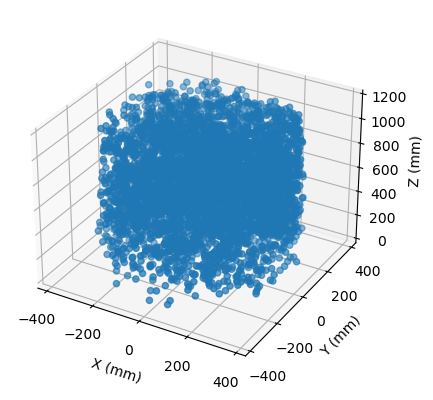

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(cut_tracks[0].x_ave, cut_tracks[0].y_ave, cut_tracks[0].z_ave)
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
plt.show()

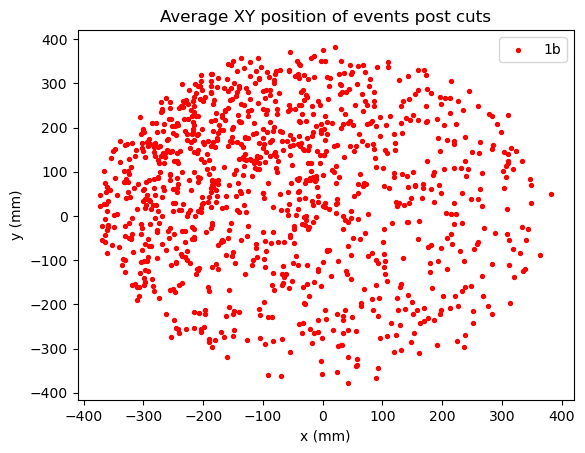

In [37]:
size = 8

plt.Figure(figsize=(10,10))
#plt.scatter(cut_tracks[0][cut_tracks[0].PORT=='1a'].x_ave, cut_tracks[0][cut_tracks[0].PORT=='1a'].y_ave, label = '1a', s = size)
plt.scatter(cut_tracks[0][cut_tracks[0].PORT=='1b'].x_ave, cut_tracks[0][cut_tracks[0].PORT=='1b'].y_ave, label = '1b', s = size, color = 'red')
#plt.scatter(cut_tracks[0][cut_tracks[0].PORT=='2a'].x_ave, cut_tracks[0][cut_tracks[0].PORT=='2a'].y_ave, label = '2a', s = size, color = 'green')
#plt.scatter(cut_tracks[0][cut_tracks[0].PORT=='2b'].x_ave, cut_tracks[0][cut_tracks[0].PORT=='2b'].y_ave, label = '2b', s = size, color = 'black')
plt.legend()
plt.title("Average XY position of events post cuts")
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.show()

Text(0.5, 0, 'Z (mm)')

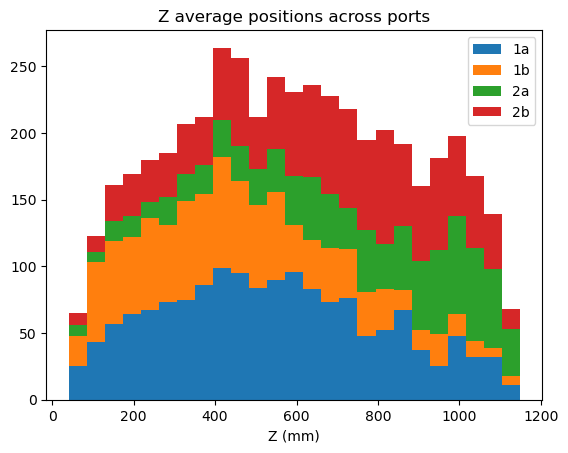

In [53]:
p1a_z = cut_tracks[0][cut_tracks[0].PORT=='1a'].z_ave
p1b_z = cut_tracks[0][cut_tracks[0].PORT=='1b'].z_ave
p2a_z = cut_tracks[0][cut_tracks[0].PORT=='2a'].z_ave
p2b_z = cut_tracks[0][cut_tracks[0].PORT=='2b'].z_ave

plt.hist([p1a_z, p1b_z, p2a_z, p2b_z], bins = 25, label = ['1a', '1b', '2a', '2b'], stacked=True)
plt.legend()
plt.title("Z average positions across ports")
plt.xlabel('Z (mm)')